# Project: Medical Appointments No Show Data Analysis
- Student: Jelena Mitrovic
- Date: May 31, 2020
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The main goal of this project is to determine which parameters are related to missing appointments data from Medical No Show Data from Kaggle website [1]. Apparently there is a significant number of people who do not show to their scheduled appointments and in this project I want to get better insight into the reasons behind this. More specifically, I want to explore what parameters are associated with not showing to an appointment as well as the difference between people who showed verus people who did not show. First, I will explore data, clean it, and prepare for further analysis. 

First thing I need to do is to import all necessary libraries - pandas, numpy, matplotlib, and seaborn, and include a 'magic word' so that visualization plots are shown in the notebook. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

First I need to load data into dataframe using pandas.read_csv function. The columns represent the following: 
 - PatientId - The unique number of a patient
 - AppointmentID - The unique number for specific appointment
 - Gender - F for female, M for male
 - ScheduledDay - Day when they scheduled an appointment
 - AppointmentDat - Day of the appointment
 - Age - Age of patient
 - Neighbourhood - Part of the city where appointment takes plase
 - Scholarship - If the patient received a scholarship, where 1 is yes, 0 is no
 - Hipertension - If the patient has hipertension, where 1 is yes, 0 is no
 - Diabetes - If the patient has diabetes, where 1 is yes, 0 is no
 - Alcoholism - If the patient consumes alcohol, where 1 is yes, 0 is no
 - Handcap - It refers to number of dissabilities the patient has
 - SMS_received - If 1 or more messages have been sent to the patient, where 1 is yes, 0 is no
 - No-show - If the patient showed to an appointment, where No means they showev, Yes means the did not show

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In order to see the size of dataframe, I will perform a shape function that shows how many rows/columns dataframe contains. Apparently, this data set contains 14 columns and 110527 rows. 

In [3]:
df.shape

(110527, 14)

To see data types and if there are some missing values, I will perform info() function. It seems that this dataframe does not have columns with missing values. However, columns ScheduledDay and AppointmentDay seem to be formatted as string so I will change the data type of those columns to be in datetime in Data Cleaning part of this project.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
print(type(df['AppointmentDay'][0]))
type(df['ScheduledDay'][0])

<class 'str'>


str

It seems that PatientID and AppointmentID will not be necessary for further analyses but before I drop them in Data Cleaning part, I want to see if there are some duplicates in a dataset by using duplicated function.

In [6]:
sum(df.duplicated())

0

The next step is to check descriptive statistics. According to the table below, it seems that minimum age is -1 and maximum is 115 so this needs to be explored more by using visualization tools. It look like the majority of people are between 18 and 55 years old. Also, the majority of people did not receive scholarship, do not have hipertension, diabetes, consume alcohol, or 1 or more dissabilities. According to the table majority of them did not receive 1 or two messages as a reminder of the appointment. 

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In order to check the distribution of all variables, if there are some outliers, and check my description of data from previous point, I will do basic histogram function.

The column Age seems to be skewed to the right.

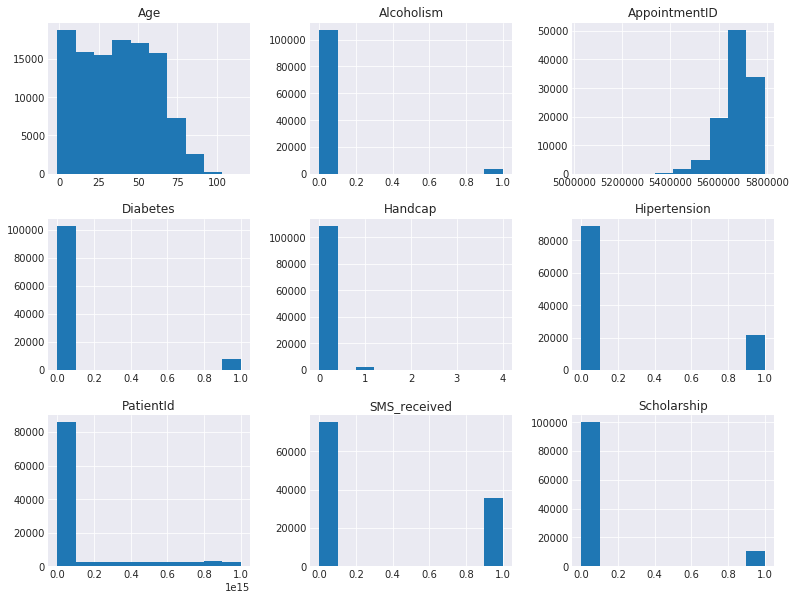

In [8]:
df.hist(figsize = (13,10));

I wanted to explore Age column even further for outliers using boxplot.

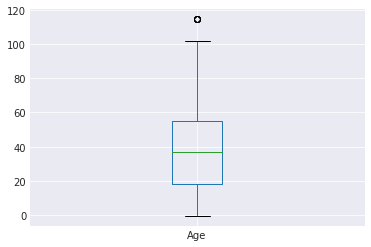

In [9]:
df['Age'].plot(kind='box')

Now, I want to explore two categorical variables, gender and no-show by using value counts function. According to tables below, the majority of patients were female and the majority of them showed to their appointments. However, significant number of people did not show to their appointments which is around 20%.  

In [10]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [11]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [12]:
22316/df.shape[0]

0.2019054167759914

### Data Cleaning

Since there are no duplicates in the dataset, I will drop PatientId and AppointmentID columns since I will not be using them for the analyses.

In [13]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In order to change type of columns 'ScheduledDay' and 'AppointmentDay', I will use pandas.to_datatime function.

In [14]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


Exploring data, I realized that some ages seem as outliers, so I will remove them from dataframe. More specifically, I will select only values equal or greater than 0 and less than 115.

In [15]:
df = df[df['Age']>=0]
df = df[df['Age']<115]

In [16]:
df['Age'].describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

Now I want to check the distribution of this variable again. It seems that this time box plot looks better when it comes to outliers. 

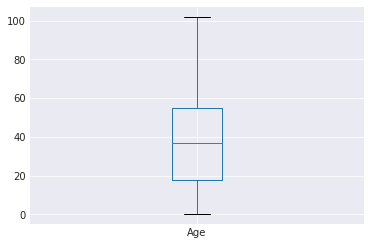

In [17]:
df['Age'].plot(kind='box')

Also, for some further analyses, I would like to create new column that would containt Age column as categorical variable. In order to do that, I will use information from describe() function - min, 25%, 50%, 75%, and max value. I will create new variable that includes those values.

In [18]:
bin_edges = [0.00000, 18.000000, 37.000000, 55.000000, 102.000000]
bin_names = ['0-18', '18-37', '37-55', '55-102']
df['Age_cat'] = pd.cut(df['Age'], bin_edges, labels = bin_names)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_cat
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,55-102
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,55-102
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,55-102
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-18
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,55-102


Now I want to create new variable that will contain specific day of week when the appointment was supposed to be with function dt.dayofweek where 0 represents Monday and 6 Sunday. In this dataframe, there are 6 unique values (used nunique() function), from 0 to 5 (used unique() function), which means that appointments were not scheduled on Sunday.

In [19]:
df['Day_of_appointment'] = df['AppointmentDay'].dt.dayofweek
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_cat,Day_of_appointment
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,55-102,4
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,55-102,4
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,55-102,4
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-18,4
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,55-102,4


In [20]:
print(df['Day_of_appointment'].nunique())
df['Day_of_appointment'].unique()

6


array([4, 1, 0, 2, 3, 5])

In order to see how many values each category has, I will perform value_counts() and sort_index() functions. According to table below, most appointments were scheduled in the first three days of week, while the least number of appointments were scheduled on Saturday.

In [21]:
df['Day_of_appointment'].value_counts().sort_index()

0    22712
1    25640
2    25867
3    17245
4    19018
5       39
Name: Day_of_appointment, dtype: int64

I will use head() function to see how dataframe looks now before I start exploratory data analysis to answer the questions mentioned in the first section.

In [22]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age_cat,Day_of_appointment
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,55-102,4
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,55-102,4
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,55-102,4
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-18,4
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,55-102,4


<a id='eda'></a>
## Exploratory Data Analysis

First I will create mask for two groups in No-show variable. Show - Group No and No_show - Group Yes. 

In [23]:
show = df['No-show']=='No'
no_show = df['No-show']=='Yes'

### 1. Relationship between Age and Not showing to an appointment

My first question is - "Is Age correlated with not showing to an appointment?". In order to answer the question, I will use groupby function to see the mean value of Age in two groups. Apparently, the difference in Age between people who show and do now show to their appointments is 3 years (people who do not show are younger) which does not seem as a significant difference when we compare two groups in general. 

In [24]:
df.groupby('No-show')['Age'].mean()

No-show
No     37.788753
Yes    34.306820
Name: Age, dtype: float64

I will now use histogram function to see the difference between people who show and do no show to their appointments. Based on a histogram below, it seems that the largest number of appointments have kids from 0 to 5 years old and people between 50 and 55. The decline of the number of appointments could be seen after 60 with a really small number after 90. It looks like people usually show more than do not show to their appointments in all age groups. However, this needs to be explored more.

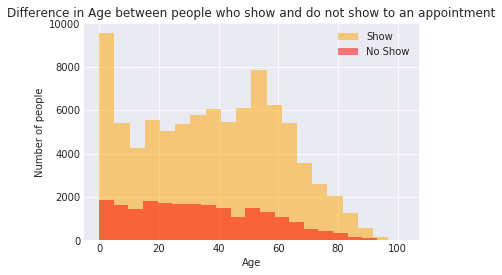

In [25]:
df.Age[show].hist(alpha = 0.5, bins=20, color = 'orange', label='Show')
df.Age[no_show].hist(alpha = 0.5, bins=20, color = 'red', label='No Show')
plt.title('Difference in Age between people who show and do not show to an appointment')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.legend();

I want to check the proportion of people who do not show compare to the total number of people in a specific group. In order to do that, I will use variable Age_cat instead of Age and show the percentage of people instead of absolute number.

I will create a new variable for age categories count using value_counts() function.

In [26]:
df['Age_cat'].value_counts(sort=False)

0-18      25327
18-37     27250
37-55     26906
55-102    27499
Name: Age_cat, dtype: int64

In [27]:
total_age = df['Age_cat'].value_counts(sort=False)

Now, I will create a new variable for age category that contains the number of people who did not show to their appointments.

In [28]:
df.Age_cat[no_show].value_counts(sort=False)

0-18      5708
18-37     6414
37-55     5255
55-102    4300
Name: Age_cat, dtype: int64

In [29]:
no_show_age = df.Age_cat[no_show].value_counts(sort=False)

The next step is to create a new variable with the percentage of no show data per each age category. In order to do that, I will divide no show data of age category by the total number of people per each category and multiply with 100. 

In [30]:
no_show_prop = no_show_age / total_age * 100

Now, I will create a bar chart that will show the percentage of no show data per each age category. According to the bar chart, the biggest percentage of people who do not show to their appointments is between 18 and 37 years old while the smallest percentage is for people who are between 55 and 102 years old.

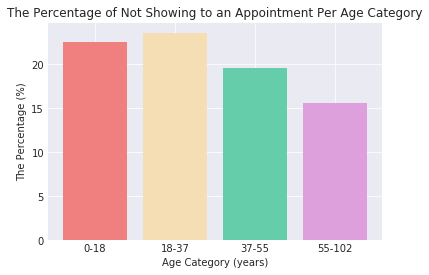

In [31]:
locations = [1,2,3,4]
labels = ['0-18', '18-37', '37-55', '55-102']
height =  no_show_prop
plt.bar(locations, height, color = ['lightcoral', 'wheat', 'mediumaquamarine', 'plum'], tick_label=labels)
plt.title('The Percentage of Not Showing to an Appointment Per Age Category')
plt.xlabel('Age Category (years)')
plt.ylabel('The Percentage (%)')
plt.legend();

### 2. Relationship between Gender and people who show and do not show to their appointments

In order to answer to my second question - "Is Gender correlated with not showing to an appointment?", I will use groupby() function to see how many people is in each category depending on the gender. It seems that the majority of men and women show to their appointment, moreover, the percentage of women who do not show to their appointments (20.31%) is less than 1 percent higher than the percentage of men who do not show to their appointments (19.97%).

In [32]:
df.groupby('Gender')['No-show'].value_counts()

Gender  No-show
F       No         57243
        Yes        14591
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

In [33]:
df['No-show'].value_counts()

No     88205
Yes    22316
Name: No-show, dtype: int64

In [34]:
df['Gender'].value_counts()

F    71834
M    38687
Name: Gender, dtype: int64

In [35]:
14591/71834

0.2031210847231116

In [36]:
7725/38687

0.19967947889471915

Now I want to visualy present these results. Slighlty bigger percentage of no show data is recorder for women. 

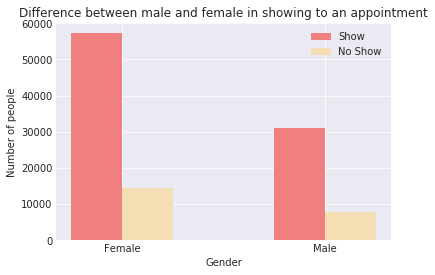

In [37]:
labels = ['Female', 'Male']
width = 0.50
ind = np.array([1,3])
show_gender = df.Gender[show].value_counts()
no_show_gender = df.Gender[no_show].value_counts()
show_bar = plt.bar(ind, show_gender, width, color = ['lightcoral'], label = 'Show')
no_show_bar = plt.bar(ind+width, no_show_gender, width, color = ['wheat'], label = 'No Show')
plt.title('Difference between male and female in showing to an appointment')
plt.xlabel('Gender')
plt.ylabel('Number of people')
locations_ticks = ind+width/2
plt.xticks(locations_ticks, labels)
plt.legend();

### 3. Relationship between receiving an SMS with showing to an appointment

My next question is - "Are the people who receive SMS as a reminder for their appointment more likely to show to that appointment?". In order to answer the question, I will use groupby() and value_counts() functions. It seems that among people who received an SMS there is a higher percentage of not showing to an appointment (27.57) than among people who did not receive an SMS (16.7%).

In [38]:
df.groupby('SMS_received')['No-show'].value_counts()

SMS_received  No-show
0             No         62508
              Yes        12532
1             No         25697
              Yes         9784
Name: No-show, dtype: int64

In [39]:
df['SMS_received'].value_counts()

0    75040
1    35481
Name: SMS_received, dtype: int64

In [40]:
12532/75040

0.1670042643923241

In [41]:
9784/35481

0.27575322003325725

Now I want to visualize data that show the difference in no show data between people who received and did not receive an SMS. Apparently, there is a higher number of people who show to their appointment if they did not receive an SMS. Also, there is a higher percentage of people who did not show to their appointments if they received an SMS.

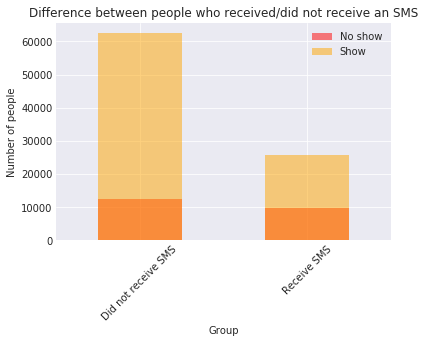

In [42]:
df.SMS_received[no_show].value_counts().plot(kind='bar', alpha=0.5, color='red', label='No show')
df.SMS_received[show].value_counts().plot(kind='bar', alpha = 0.5, color='orange', label='Show')
plt.xticks([0,1],['Did not receive SMS', 'Receive SMS'], rotation=45)
plt.title('Difference between people who received/did not receive an SMS')
plt.xlabel('Group')
plt.ylabel('Number of people')
plt.legend();

### 4. Relationship between Day of the week and Not showing to an appointment

The final question is - "Is day of the week correlated with not showing to an appointment?". In order to answer this question, I will use groupby() function to see the number of people in each category per day.

In [43]:
df.groupby('Day_of_appointment')['No-show'].value_counts()

Day_of_appointment  No-show
0                   No         18023
                    Yes         4689
1                   No         20488
                    Yes         5152
2                   No         20774
                    Yes         5093
3                   No         13909
                    Yes         3336
4                   No         14981
                    Yes         4037
5                   No            30
                    Yes            9
Name: No-show, dtype: int64

To better understand the results from above, I will create double bar chart that shows the difference between showing and not showing to an appointment each day of the week, except for Sunday. The number of people who show to their appointments is the biggest on Tuesday and Wednesday as well as the total number of appointments scheduled for those days. Although on Saturday there is only a small number of people who were scheduled, 23% of them did not show to their appointments. 

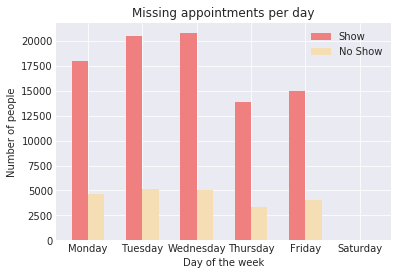

In [44]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
width = 0.60
ind = np.array([1,3,5,7,9,11])
show_week = df.Day_of_appointment[show].value_counts(sort=False)
no_show_week = df.Day_of_appointment[no_show].value_counts(sort=False)
show_week_bar = plt.bar(ind, show_week, width, color = ['lightcoral'], label = 'Show')
no_show_week_bar = plt.bar(ind+width, no_show_week, width, color = ['wheat'], label = 'No Show')
plt.title('Missing appointments per day')
plt.xlabel('Day of the week')
plt.ylabel('Number of people')
locations_ticks = ind+width/2
plt.xticks(locations_ticks, labels)
plt.legend();

<a id='conclusions'></a>
## Conclusions

The main goal of this project was to determine which parameters are related with not showing to medical appointments. In order to better understand no show data, I performed basic pandas functions to get a better insight into data types, missing data, duplicates, descriptive statistics, and distribution of columns. After that, I cleaned data by dropping unnecessary columns, changing types of specific columns, and creating two new variables. Once the dataframe was ready for analyses, I separated analyses depending on the question they answer. 

The parameters that were brought into relationship with no show data were Age, Gender, if people received an SMS or not, and day of the appointment. According to the results, people are generally more likely to show to an appointment across all age groups but younger people are more likely not to show to an appointment. The biggest percentage of people who did not show to an appointment are between 18 and 37 years old. Women generally have more scheduled appointments but they are also slightly more likely not to show to an appointment. The interesting result is that the people who received an SMS as a reminder for their appointment are more likely not to show to their appointment which is counterintuitive. The biggest number of people who show to their appointments is on Tuesday and Wednesday as well as the total number of appointments scheduled for those days. Even though the smallest number of appointments is on Saturday, 23% did not happen due to people not showing to them.

There are a couple of limitations in this project related to data that I want to address. When it comes to age, there were outliers such as -1 age for which I assumed was a mistake as well as age 115 because on boxplot it was an outlier. However, it might be possible that there was a person 115 years old. Next, there was a disproportional number of women to men which is the reason why I also took into account the total number of them separately instead of the total number of all people. Even though I found that SMS_received is a binary variable, there was no information regarding the coding of them. I assumed that 0 meant they did not receive and 1 that they received an SMS. However, it might be opposite given the counterintuitive results I got. Moreover, I was not sure why some people received an SMS and some not, as well as the content of SMS. Lastly, it was not really clear if appointments on Saturday were actually supposed to happen that day or if that was a mistake. The reason for this lies in a very small number of appointments scheduled for that day comparing to any other day. 

### References

[1] Data retrieved from https://www.kaggle.com/joniarroba/noshowappointments

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0